In this work I have Applied a machine learning algorithmn named KNN(KNearestNeighbour)to classify while a passenger survived or not by utilizing the Titanic Dataset. Here I use Kbest feature selection technique where I found out the most relavent 6 features for the target column. Although the model able to callsify if the passenger survive or not but there is a scope to increase the model efficiency more better.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [93]:
df= pd.read_csv("/kaggle/input/titanic/titanic.csv")

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df.isnull().sum() # findout the total null value for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
df.info() #see each column info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# preprocessing step

# drop some irrelevent column don't have specific contribution to target column

In [97]:
df.drop(["Name","Ticket","Cabin"], axis = 1, inplace= True)

In [98]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# fill nan values of Age column with the column mean value 

In [99]:
mean_age= df["Age"].mean()
mean_age
df["Age"]= df["Age"].fillna(mean_age)

In [100]:
# drop null values for Embarked column

In [101]:
df.dropna(subset=["Embarked"], inplace=True)

In [102]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [103]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# all the columns are now clean

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoder to sex and Embarked column 

In [105]:
# Fit and transform "Sex" column
df["Sex"] = le.fit_transform(df["Sex"])

# Fit and transform "Embarked" column
df["Embarked"] = le.fit_transform(df["Embarked"])


In [106]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# data visualization

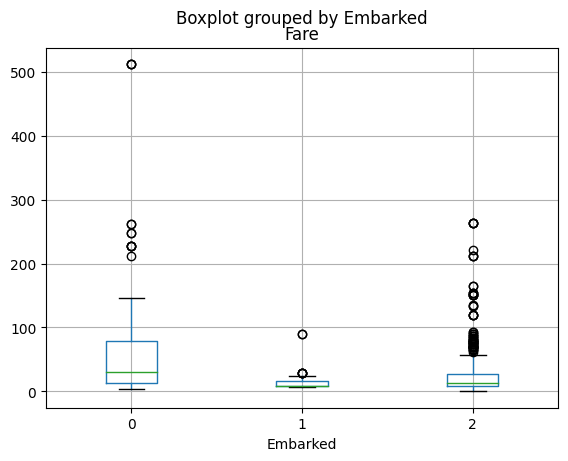

In [87]:
df.boxplot(column="Fare",by = "Embarked")
plt.show()

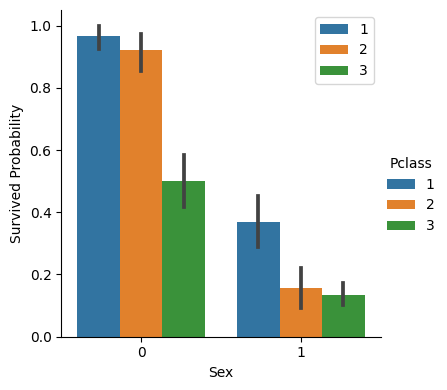

In [88]:
x = sns.catplot(x="Sex", y="Survived", data=df, kind="bar", height=4, hue="Pclass")
x.set_ylabels("Survived Probability")
plt.legend()
plt.show()

<Axes: xlabel='Embarked'>

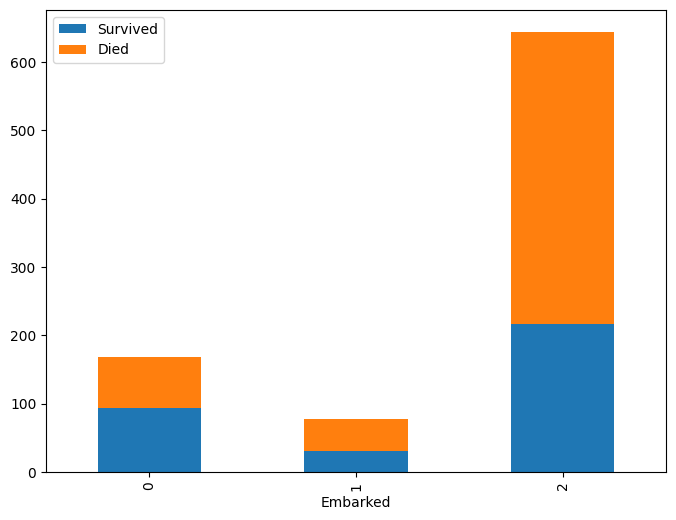

In [89]:
df["Died"]=  1 - df["Survived"]
df.groupby("Embarked").agg("sum")[["Survived", "Died"]].plot(kind= "bar", figsize=(8,6), stacked = True)

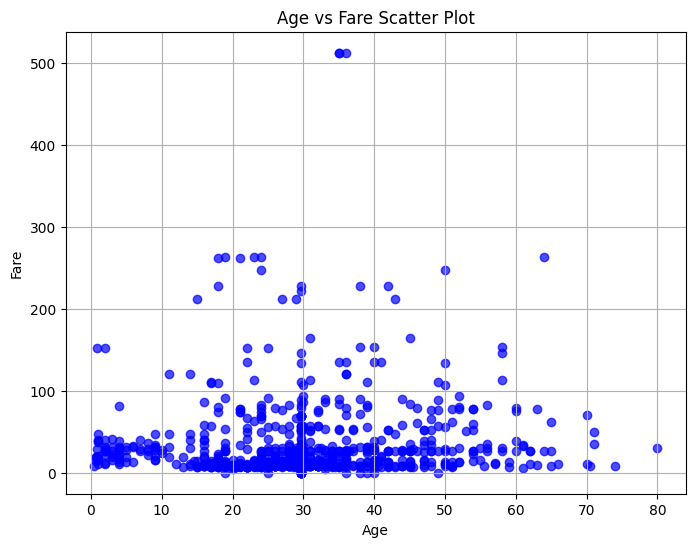

In [90]:
# Creating scatter plot for Age vs Fare
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], color='blue', alpha=0.7)
plt.title('Age vs Fare Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

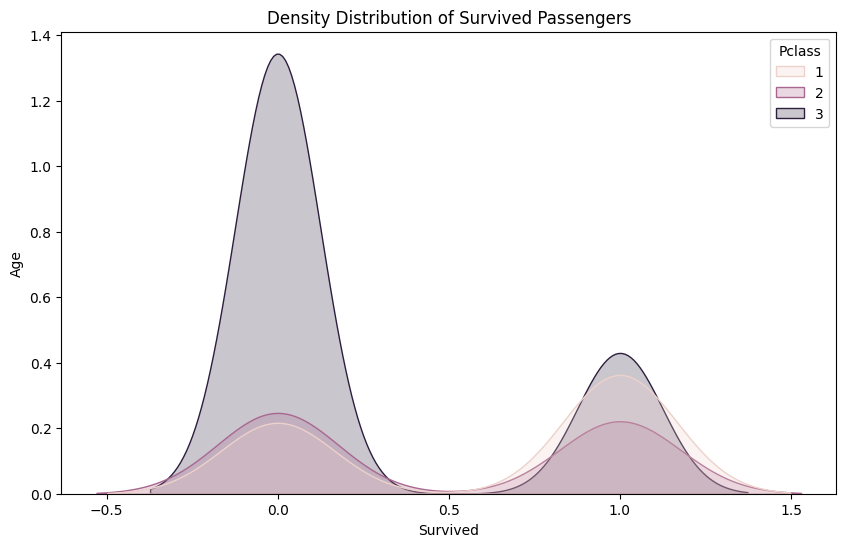

In [91]:
# Plot density distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Survived', fill=True, hue = "Pclass")
plt.title('Density Distribution of Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# separate x and y column

In [107]:
x = df.drop("Survived", axis= 1)

In [108]:
y = df[["Survived"]]

In [109]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [110]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# apply KBest apporach to find out the best feature  

In [111]:
from sklearn.feature_selection import SelectKBest, f_classif  #chi2 only when features are non negative

In [112]:
model2 = SelectKBest(score_func=f_classif, k=6)  # Select top 5 features

In [113]:
feature_score = model2.fit(x,y)

In [114]:
feature_score.scores_

array([2.24274791e-02, 1.12541402e+02, 3.68154732e+02, 4.97368590e+00,
       1.02897829e+00, 6.17546233e+00, 6.18388851e+01, 2.63069763e+01])

In [115]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

,Feature_Scores
0,0.022427
1,112.541402
2,368.154732
3,4.973686
4,1.028978
5,6.175462
6,61.838885
7,26.306976


In [116]:
x.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [117]:
col2 = pd.DataFrame(x.columns, columns=['Feature_Names'])
col2.head

<bound method NDFrame.head of   Feature_Names
0   PassengerId
1        Pclass
2           Sex
3           Age
4         SibSp
5         Parch
6          Fare
7      Embarked>

In [118]:
scores = pd.concat([col2,cols],axis=1)
scores

,Feature_Names,Feature_Scores
0,PassengerId,0.022427
1,Pclass,112.541402
2,Sex,368.154732
3,Age,4.973686
4,SibSp,1.028978
5,Parch,6.175462
6,Fare,61.838885
7,Embarked,26.306976


In [119]:
scores.nlargest(6,'Feature_Scores')

,Feature_Names,Feature_Scores
2,Sex,368.154732
1,Pclass,112.541402
6,Fare,61.838885
7,Embarked,26.306976
5,Parch,6.175462
3,Age,4.973686


In [120]:
x = df.drop(['PassengerId','SibSp','Survived'], axis=1)

In [121]:
x.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,1,22.0,0,7.2500,2
1,1,0,38.0,0,71.2833,0
2,3,0,26.0,0,7.9250,2
3,1,0,35.0,0,53.1000,2
4,3,1,35.0,0,8.0500,2


In [122]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [123]:
# spliting the dataset 

In [124]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=.20, random_state=42)

In [125]:
xtrain.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
708,1,0,22.000000,0,151.5500,2
240,3,0,29.699118,0,14.4542,0
382,3,1,32.000000,0,7.9250,2
792,3,0,29.699118,2,69.5500,2
683,3,1,14.000000,2,46.9000,2


In [126]:
ytrain.head()

,Survived
708,1
240,0
382,0
792,0
683,0


In [127]:
xtest.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
281,3,1,28.0,0,7.8542,2
435,1,0,14.0,2,120.0000,2
39,3,0,14.0,0,11.2417,0
418,2,1,30.0,0,13.0000,2
585,1,0,18.0,2,79.6500,2


In [128]:
ytest.head()

,Survived
281,0
435,1
39,1
418,0
585,1


In [129]:
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)


xtrain shape: (711, 6)
xtest shape: (178, 6)
ytrain shape: (711, 1)
ytest shape: (178, 1)


In [130]:
import warnings
warnings.filterwarnings("ignore")


# apply the model KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [132]:
accuracy_train_list = []
accuracy_test_list = []
f1_train_list =[]
f1_test_list=[]
for i in range(45,65):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(xtrain, ytrain)
    
    # Test the training data
    y_pred_train = neigh.predict(xtrain)
    accuracy_train = accuracy_score(y_pred_train,ytrain)
    accuracy_train_list.append(accuracy_train)
    f1_train = f1_score(y_pred_train,ytrain)
    f1_train_list.append(f1_train)
    
    

    # Test the test data
    y_pred_test = neigh.predict(xtest)
    accuracy_test = accuracy_score(y_pred_test,ytest)
    accuracy_test_list.append(accuracy_test)
    f1_test = f1_score(y_pred_test,ytest)
    f1_test_list.append(f1_test)

   
    print(accuracy_train,accuracy_test)
    print(f1_train,f1_test)
    print()

K 45
0.70042194092827 0.6853932584269663
0.5011709601873536 0.5254237288135593

K 46
0.69901547116737 0.702247191011236
0.4928909952606635 0.5309734513274336

K 47
0.70042194092827 0.6966292134831461
0.5034965034965034 0.5263157894736841

K 48
0.6976090014064698 0.6966292134831461
0.4893111638954869 0.5263157894736841

K 49
0.6976090014064698 0.6966292134831461
0.5011600928074247 0.5423728813559322

K 50
0.6976090014064698 0.6966292134831461
0.4941176470588236 0.5263157894736841

K 51
0.6962025316455697 0.6853932584269663
0.5113122171945702 0.5254237288135593

K 52
0.6919831223628692 0.6797752808988764
0.496551724137931 0.5128205128205128

K 53
0.6947960618846695 0.6910112359550562
0.5079365079365079 0.5378151260504201

K 54
0.6962025316455697 0.6797752808988764
0.5045871559633028 0.5128205128205128

K 55
0.6962025316455697 0.6853932584269663
0.5135135135135135 0.5254237288135593

K 56
0.6962025316455697 0.6853932584269663
0.4976744186046512 0.5172413793103449

K 57
0.69901547116737 0.

# see the accuracy score 

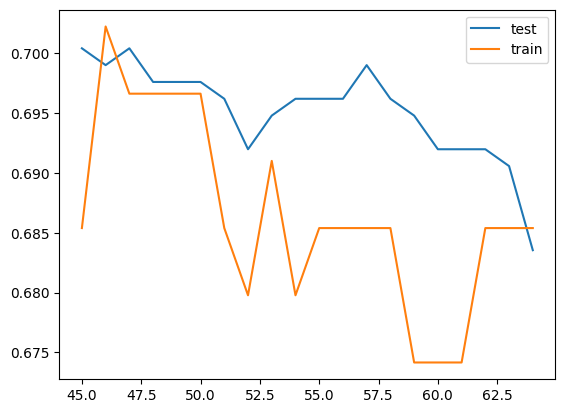

In [133]:
plt.plot(list(range(45,65)),accuracy_train_list)
plt.plot(list(range(45,65)),accuracy_test_list)
plt.legend(['test','train'])
plt.show()

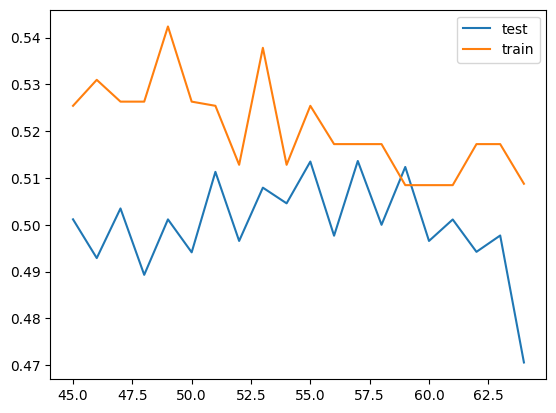

In [134]:
plt.plot(list(range(45,65)),f1_train_list)
plt.plot(list(range(45,65)),f1_test_list)
plt.legend(['test','train'])
plt.show()

In [135]:
from sklearn.metrics import classification_report
target_names = ['Survive', 'died']
# print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_test, ytest, target_names=target_names))

              precision    recall  f1-score   support

     Survive       0.85      0.70      0.77       133
        died       0.42      0.64      0.51        45

    accuracy                           0.69       178
   macro avg       0.64      0.67      0.64       178
weighted avg       0.74      0.69      0.70       178



In [136]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_test, ytest)
c

array([[93, 40],
       [16, 29]])

<Axes: >

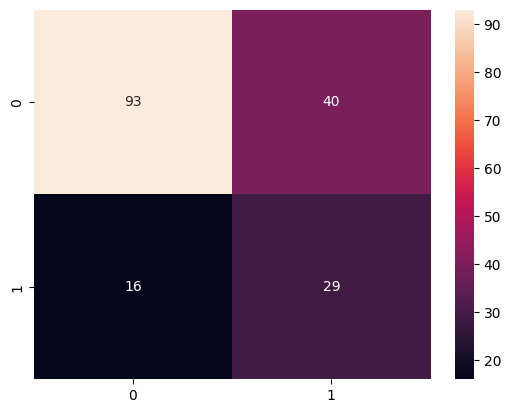

In [137]:
import seaborn as sns
sns.heatmap(c, annot=True)

Test model with unknown data

In [138]:
data = {
    "Pclass": [3],
    "Sex": [1],
    "Age": [26],
   
    "Parch":[5],
    "Fare" : [1300],
    "Embarked": [3]
    
    
}
data2 = {
    "Pclass": [3],
    "Sex": [1],
    "Age": [38],
   
    "Parch":[0],
    "Fare" : [8],
    "Embarked": [2]
       
}
unknown_df = pd.DataFrame(data)
unknown_df1 = pd.DataFrame(data2)

# Display the DataFrame
print(unknown_df)
print(unknown_df1)
				

   Pclass  Sex  Age  Parch  Fare  Embarked
0       3    1   26      5  1300         3
   Pclass  Sex  Age  Parch  Fare  Embarked
0       3    1   38      0     8         2


In [139]:
y_pred_unknown = neigh.predict(unknown_df)
y_pred_unknown

array([1])

In [140]:
y_pred_unknown = neigh.predict(unknown_df1)
y_pred_unknown

array([0])